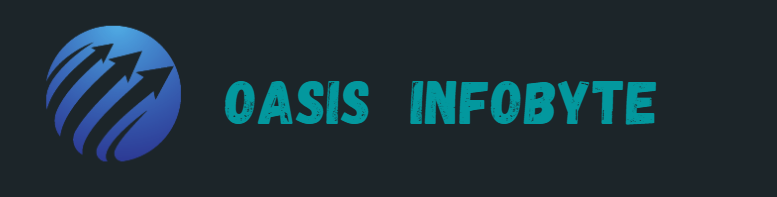

# Task3: CAR PRICE PREDICTION USING MACHINE LEARNING

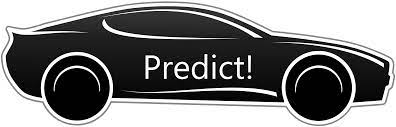

The price of a car depends on a lot of factors like the goodwill of the brand of the car,features of the car, horsepower and the mileage it gives and many more. Car priceprediction is one of the major research areas in machine learning.

Dataset: https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading DataFrame

In [2]:
df=pd.read_csv('CarPrice.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## DataFrame Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Descriptive Statistics

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Checking for NaN and Duplicated Values

In [5]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

## #Target Column

## Price

Text(0.5, 1.0, 'Car Price Distribution')

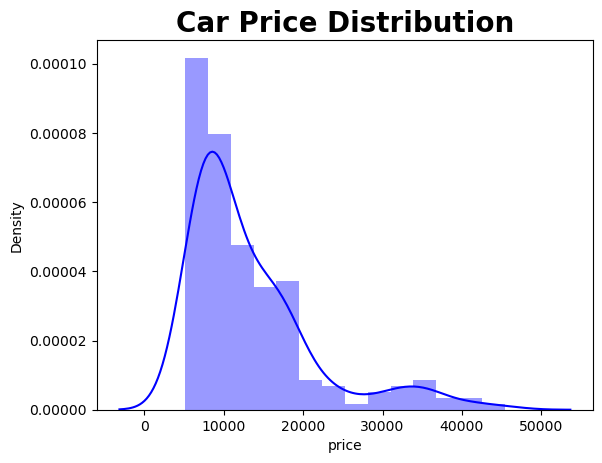

In [7]:
sns.distplot(df['price'],color='b')
plt.title('Car Price Distribution',size=20,fontweight="black")

## #Categorical Column

## Checking unique Values in column

In [8]:
catcol = df.select_dtypes(object).columns
for i in catcol:
    print(i)
    print(df[i].unique())
    print()

CarName
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick ope

## Drivewheel

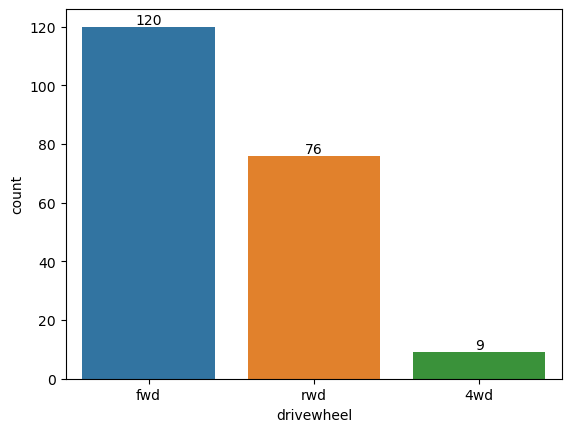

In [9]:
ax= sns.countplot(data=df,x='drivewheel',order=df['drivewheel'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)

## Cylinder Number

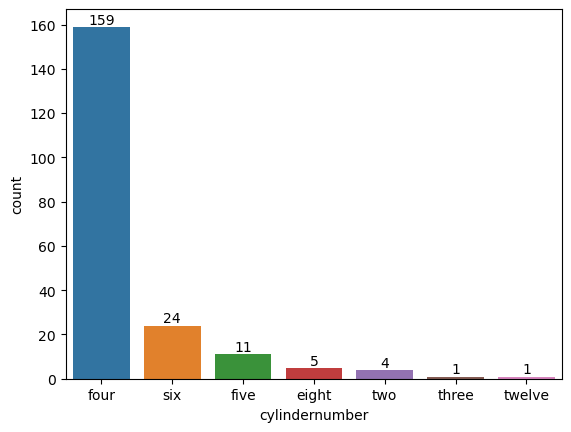

In [10]:
ax= sns.countplot(data=df,x='cylindernumber',order=df['cylindernumber'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)

## Fuel Type

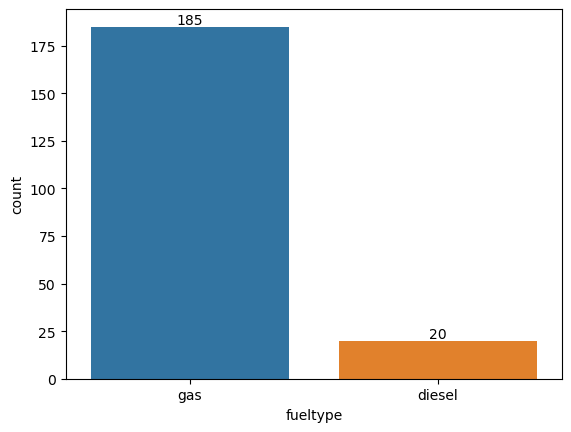

In [11]:
ax= sns.countplot(data=df,x='fueltype',order=df['fueltype'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)

## Aspiration

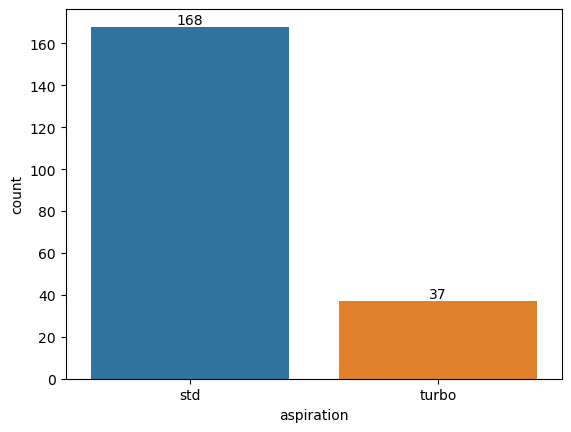

In [12]:
ax= sns.countplot(data=df,x='aspiration',order=df['aspiration'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)

## Correlation Matrix

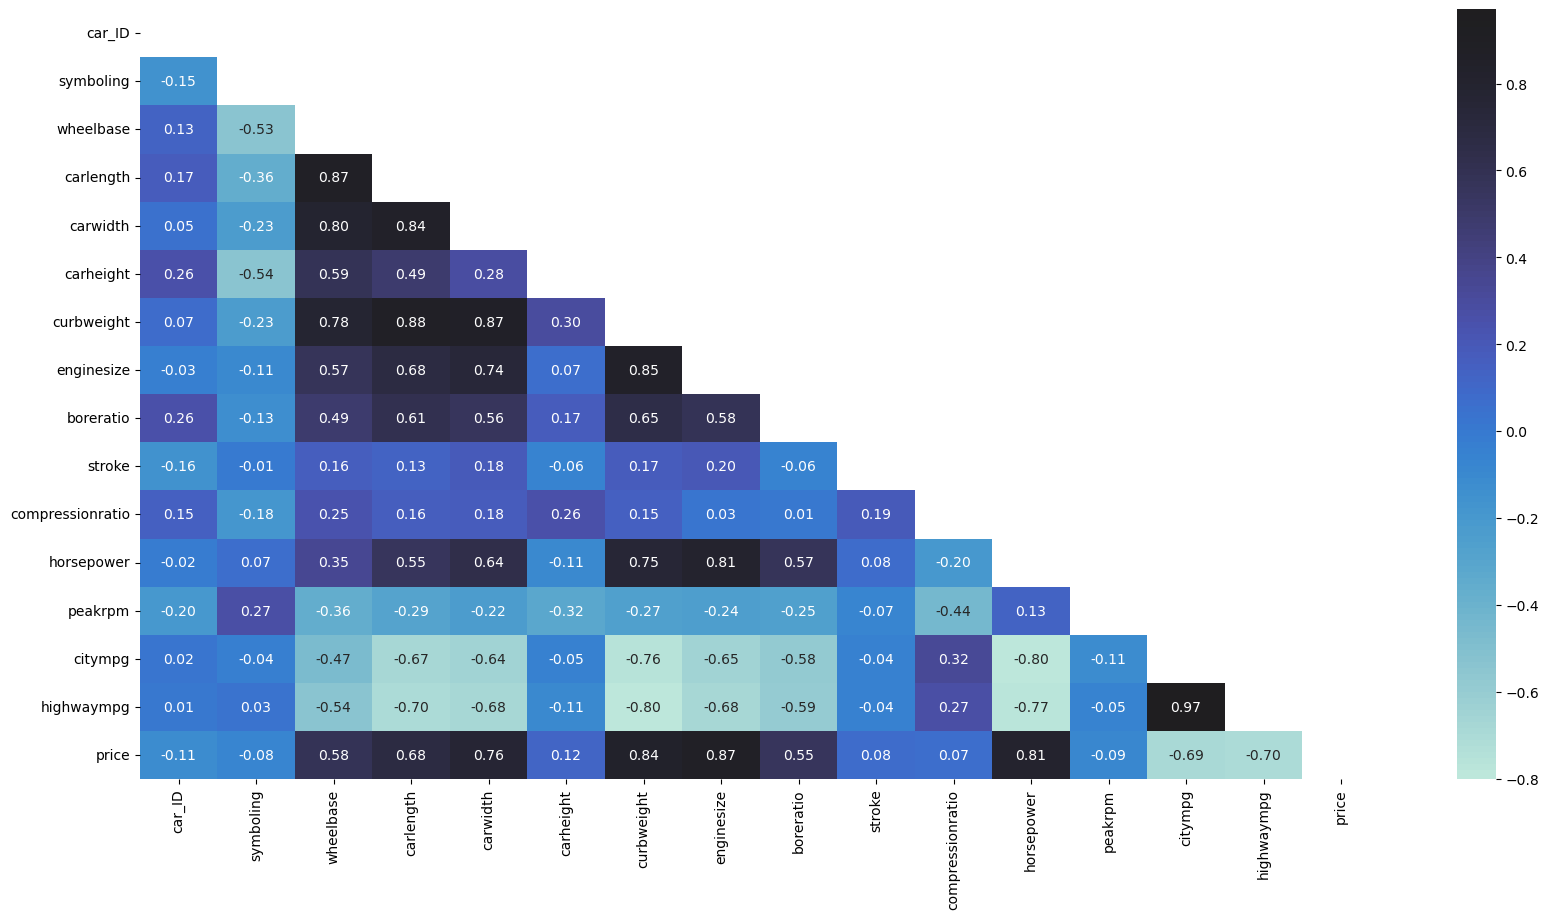

In [13]:
corr= df.corr()
matrix = np.triu(corr)
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True, mask=matrix, fmt = ".2f",center=1);

## Cleaning Dataframe

In [14]:
df["fuelsystem"] =  df["fuelsystem"].replace(['mpfi', 'mfi'], "fi")
df["fuelsystem"] =  df["fuelsystem"].replace(['1bbl', '2bbl','4bbl'], "bbl")
df["fuelsystem"] =  df["fuelsystem"].replace(['spdi', 'idi','4bbl'], "spfi")

In [15]:
df["fuelsystem"].value_counts()

fi      95
bbl     80
spfi    30
Name: fuelsystem, dtype: int64

## Cleaning CarName

In [16]:
df['Brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['Brand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Brand, dtype: int64

In [17]:
df['Brand'] = df['Brand'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
df['Brand'].value_counts()

toyota         32
Nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: Brand, dtype: int64

## Droping Columns

In [18]:
df.drop(['car_ID','CarName','symboling'],axis=1,inplace=True)

In [19]:
df.describe(include='all')

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
count,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205
unique,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toyota
freq,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
mean,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [21]:
numcol=df.select_dtypes([int,float]).columns
catcol = df.select_dtypes(object).columns
len(catcol)

10

In [22]:
len(numcol)

14

In [23]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

df[catcol]=oe.fit_transform(df[catcol])

In [24]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,64.1,48.8,2548,0.0,2.0,130,1.0,3.47,2.68,9.0,111,5000,21,27,13495.0,1.0
1,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,64.1,48.8,2548,0.0,2.0,130,1.0,3.47,2.68,9.0,111,5000,21,27,16500.0,1.0
2,1.0,0.0,1.0,2.0,2.0,0.0,94.5,171.2,65.5,52.4,2823,5.0,3.0,152,1.0,2.68,3.47,9.0,154,5000,19,26,16500.0,1.0
3,1.0,0.0,0.0,3.0,1.0,0.0,99.8,176.6,66.2,54.3,2337,3.0,2.0,109,1.0,3.19,3.40,10.0,102,5500,24,30,13950.0,2.0
4,1.0,0.0,0.0,3.0,0.0,0.0,99.4,176.6,66.4,54.3,2824,3.0,1.0,136,1.0,3.19,3.40,8.0,115,5500,18,22,17450.0,2.0


## Pairplot

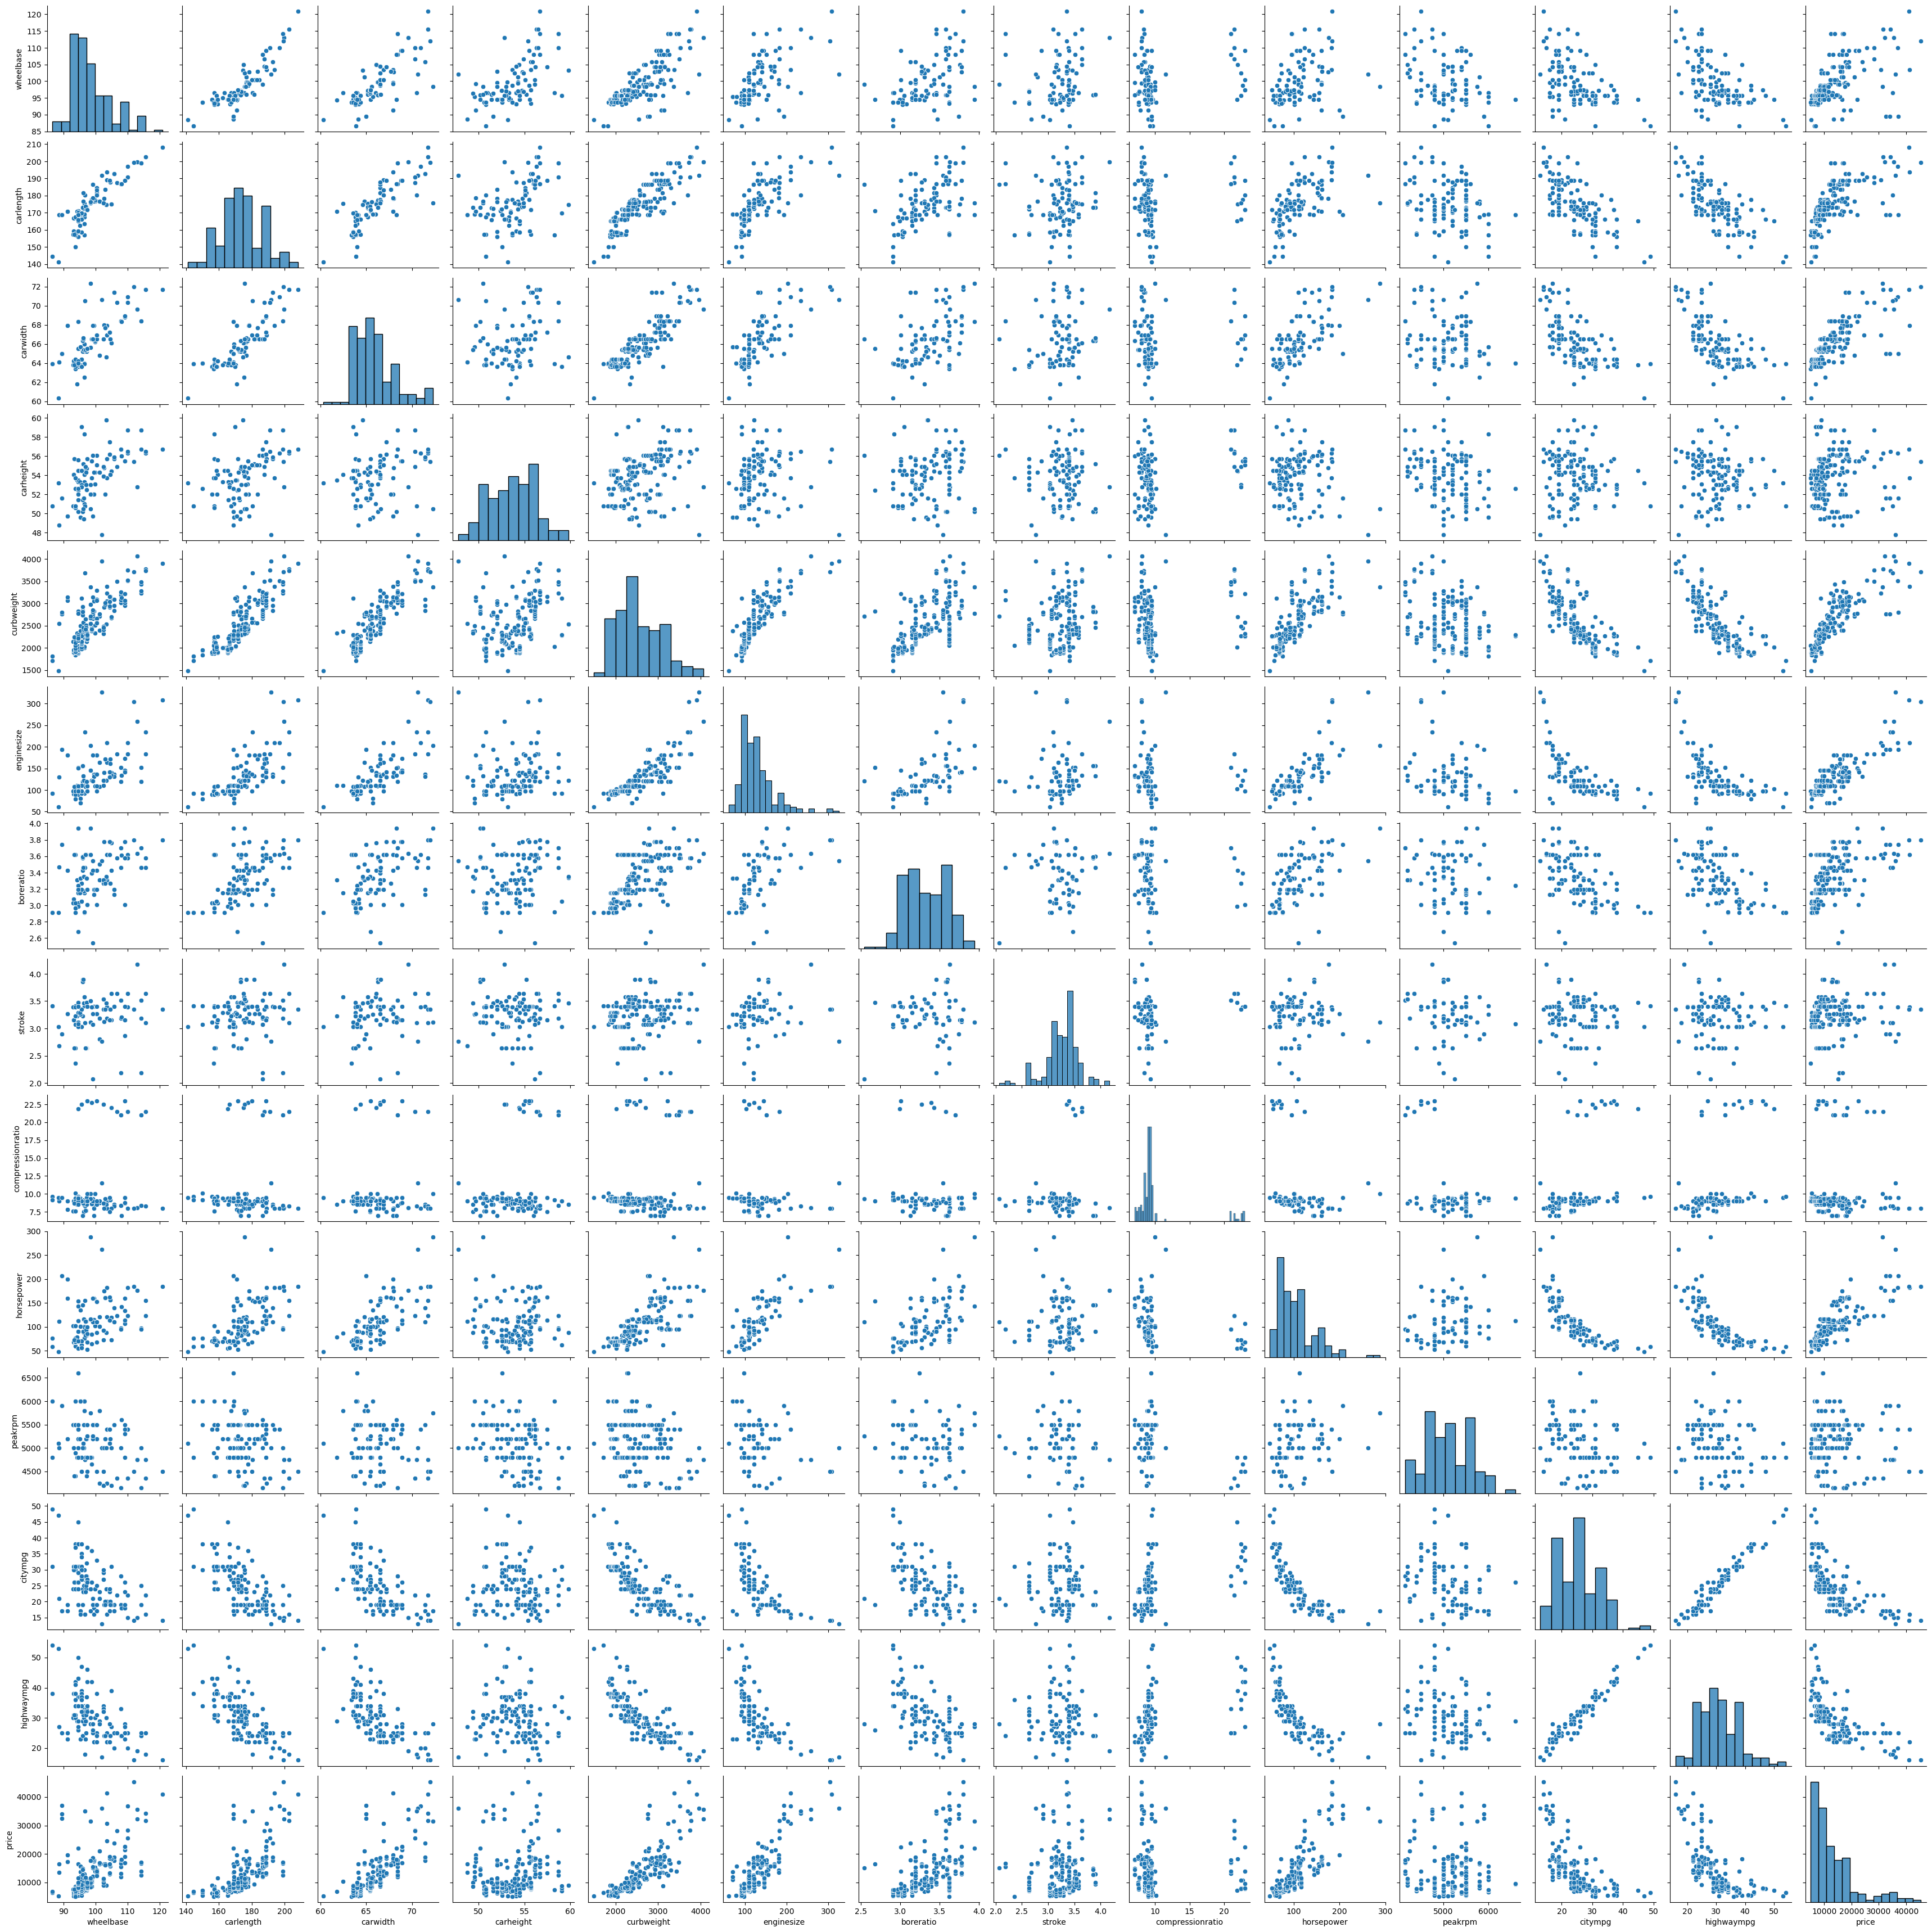

In [25]:
sns.pairplot(df[numcol])

In [26]:
df.corr()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
fueltype,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,-0.284631,-0.217275,0.082695,0.110617,-0.069594,-0.592123,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679,-0.065597
aspiration,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,-0.102963,-0.133119,0.108217,0.551335,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926,0.060091
doornumber,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,-0.552208,-0.197379,0.062431,0.154322,-0.020742,-0.071848,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835,-0.143542
carbody,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,0.568534,0.128467,-0.037024,-0.048408,-0.073352,0.022512,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976,0.053781
drivewheel,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,-0.019719,0.575111,-0.116823,0.223238,0.524307,0.360760,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992,-0.007548
enginelocation,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,0.050468,0.114127,0.135541,0.196826,0.043033,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973,0.060707
wheelbase,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,-0.135577,-0.184596,0.569329,0.437143,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,0.061688
carlength,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,-0.113291,-0.109585,0.683360,0.502140,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,0.057615
carwidth,-0.233880,0.300567,-0.207168,0.131710,0.470751,-0.051698,0.795144,0.841118,1.000000,0.279210,0.867032,0.012298,-0.194074,0.735433,0.503243,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.033914
carheight,-0.284631,0.087311,-0.552208,0.568534,-0.019719,-0.106234,0.589435,0.491029,0.279210,1.000000,0.295572,-0.127002,-0.283845,0.067149,0.133981,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,0.158837


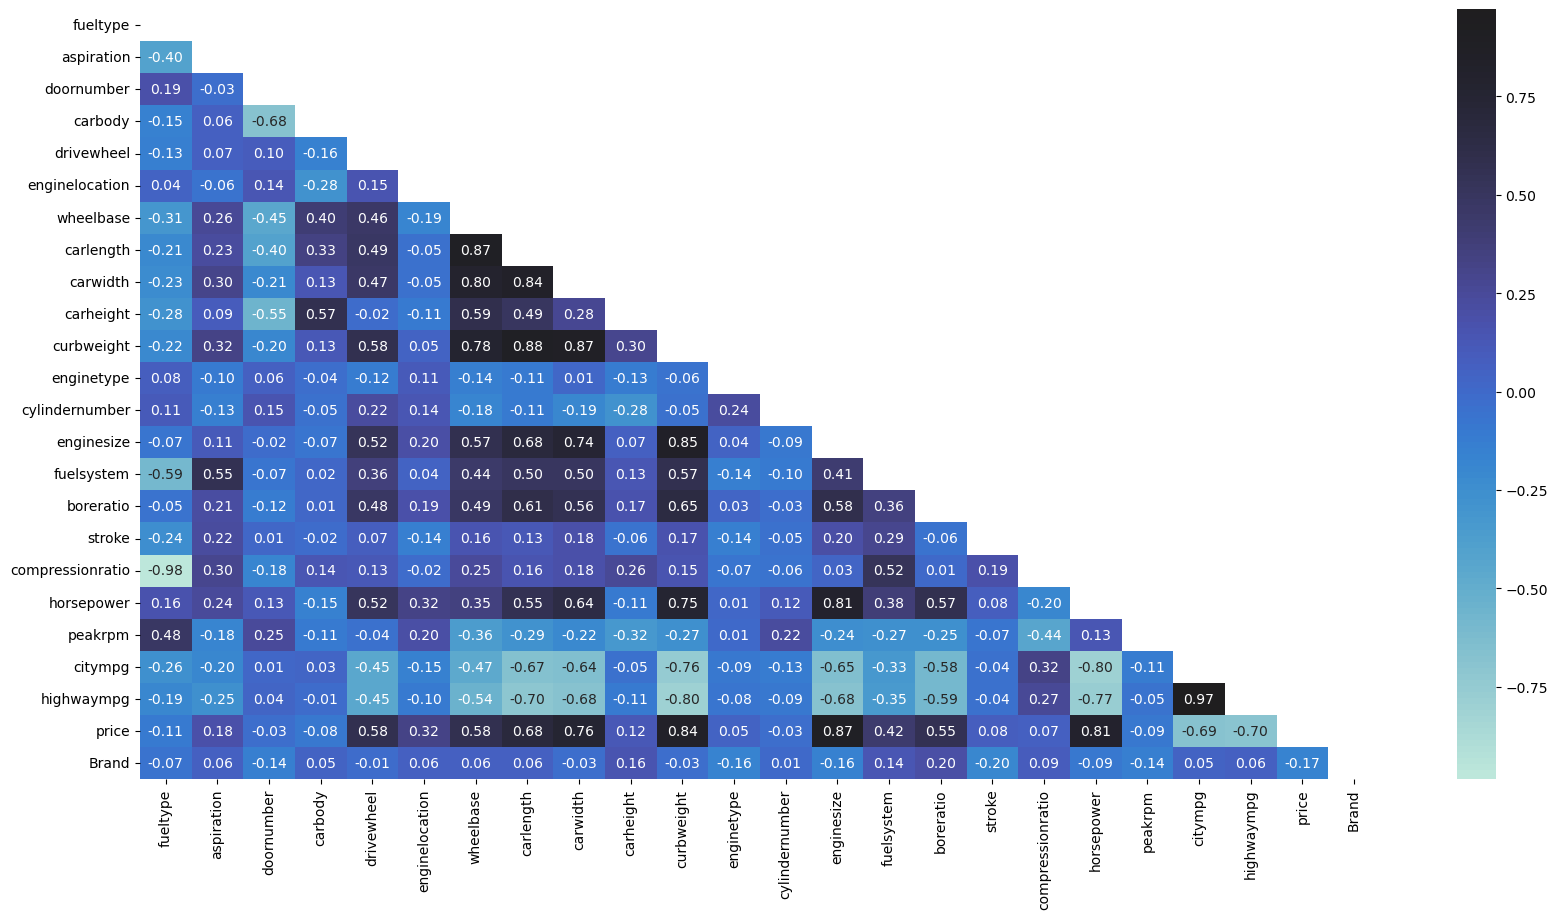

In [27]:
corr= df.corr()
matrix = np.triu(corr)
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True, mask=matrix, fmt = ".2f",center=1);

## Spliting DataFrame

In [28]:
x=df.drop('price',axis=1)
y=df['price']

In [29]:
x.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Brand
0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,64.1,48.8,2548,0.0,2.0,130,1.0,3.47,2.68,9.0,111,5000,21,27,1.0
1,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,64.1,48.8,2548,0.0,2.0,130,1.0,3.47,2.68,9.0,111,5000,21,27,1.0
2,1.0,0.0,1.0,2.0,2.0,0.0,94.5,171.2,65.5,52.4,2823,5.0,3.0,152,1.0,2.68,3.47,9.0,154,5000,19,26,1.0
3,1.0,0.0,0.0,3.0,1.0,0.0,99.8,176.6,66.2,54.3,2337,3.0,2.0,109,1.0,3.19,3.40,10.0,102,5500,24,30,2.0
4,1.0,0.0,0.0,3.0,0.0,0.0,99.4,176.6,66.4,54.3,2824,3.0,1.0,136,1.0,3.19,3.40,8.0,115,5500,18,22,2.0


## train_test_split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Model Building

## LinearRegression

In [32]:
from sklearn.linear_model import LinearRegression

linreg= LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression()

## Model Evaluation

In [33]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,make_scorer

In [34]:
ypred=linreg.predict(X_test)
mae=mean_absolute_error(y_test,ypred)
rmse=np.sqrt(mean_squared_error(y_test,ypred))
R2score=r2_score(y_test,ypred)

In [35]:
print(f'Mean Absolute Error:- {mae}')
print(f'Root Mean Square Error:- {rmse}')
print(f'R2 Score:-  {R2score}')

Mean Absolute Error:- 2342.887681607758
Root Mean Square Error:- 3830.1145470128977
R2 Score:-  0.8141749396625941


## Residue Plot

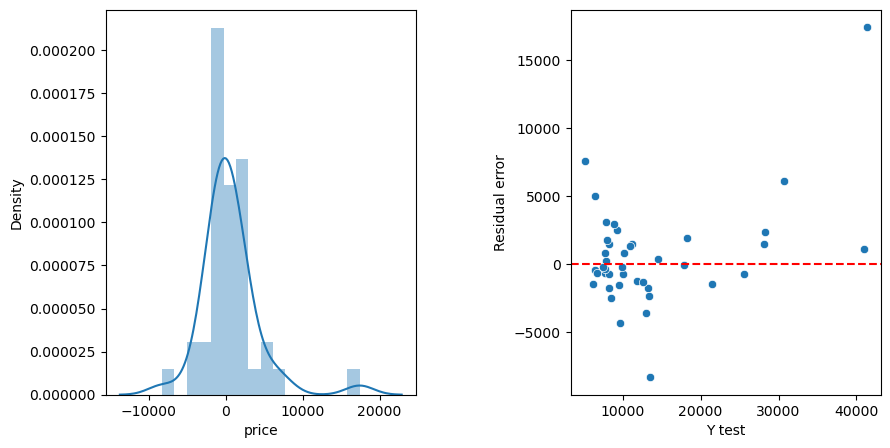

In [36]:
residue =y_test-ypred
fig, axes = plt.subplots( 1,2, figsize=(10,5))
sns.distplot(residue,ax=axes[0])
sns.scatterplot(x=y_test,y= residue,ax=axes[1])
plt.axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Y test')
axes[1].set_ylabel('Residual error')
fig.subplots_adjust(wspace=0.5)

## Checking Training and Testing Accuracy

In [37]:
train=linreg.score(X_train,y_train)
test=linreg.score(X_test,y_test)
print(f'Train:-{train}')
print(f'Test:-{test}')

Train:-0.9012898262389617
Test:-0.8141749396625941


In [38]:
x.columns.values

array(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'Brand'], dtype=object)

### RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rfr=RandomForestRegressor(n_estimators = 100,
                              random_state = 1,
                              n_jobs = -1)
rfr.fit(X_train,y_train)
ypred=rfr.predict(X_test)

mae_rf=mean_absolute_error(y_test,ypred,)
rmse_rf=np.sqrt(mean_absolute_error(y_test,ypred,))
R2score_rf=r2_score(y_test,ypred)

print(f'Mean Absolute Error:--{mae_rf}')
print(f'Root Mean Square Error:--{rmse_rf}')
print(f'R2 Score:--{R2score_rf}')
print()
train=rfr.score(X_train,y_train)
test=rfr.score(X_test,y_test)
print(f'Train:-{train}')
print(f'Test:-{test}')

Mean Absolute Error:--1270.2393414634146
Root Mean Square Error:--35.640417245922
R2 Score:--0.9586512772099494

Train:-0.9838346342005152
Test:-0.9586512772099494


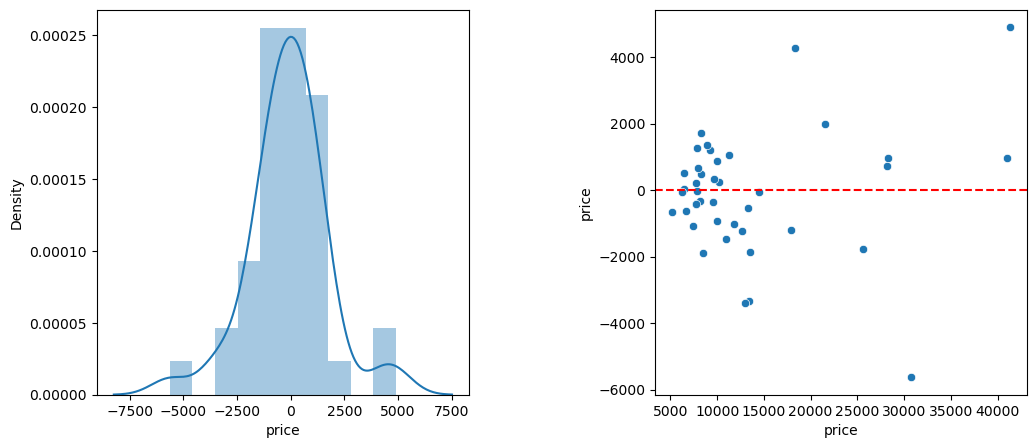

In [41]:
residue =y_test-ypred
fig, axes = plt.subplots( 1,2, figsize=(12,5))
sns.distplot(residue,ax=axes[0])
sns.scatterplot( x=y_test,y=residue,ax=axes[1])
plt.axhline(y=0, color='r', linestyle='--')
fig.subplots_adjust(wspace=0.5)

#### RandomForestRegressor Performs best with an R2_score of 95%

#  Deep Learning

## Artificial Neural Network

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from scipy.stats.morestats import optimize

### Spliting DataFrame

In [43]:
x=df.drop('price',axis=1).values
y=df['price'].values

### Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

### train_test_split

In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [46]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)

### ANN Network Building

In [47]:
ann=Sequential()
ann.add(Dense(units=500,activation="relu"))
ann.add(Dense(units=500,activation="relu"))
ann.add(Dense(units=500,activation="relu"))
ann.add(Dense(units=1))
ann.compile(optimizer="adam", loss="mse")
ann.fit(xtrain,ytrain,epochs=500,validation_data=[xtest,ytest])

Epoch 1/500
6/6 [==============================] - 1s 35ms/step - loss: 249028032.0000 - val_loss: 202241744.0000
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 248486368.0000 - val_loss: 201312128.0000
Epoch 3/500
6/6 [==============================] - 0s 11ms/step - loss: 246732768.0000 - val_loss: 198890896.0000
Epoch 4/500
6/6 [==============================] - 0s 11ms/step - loss: 242889328.0000 - val_loss: 193682672.0000
Epoch 5/500
6/6 [==============================] - 0s 11ms/step - loss: 234252384.0000 - val_loss: 183600704.0000
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 217306832.0000 - val_loss: 166566016.0000
Epoch 7/500
6/6 [==============================] - 0s 13ms/step - loss: 191350928.0000 - val_loss: 141561456.0000
Epoch 8/500
6/6 [==============================] - 0s 11ms/step - loss: 156262384.0000 - val_loss: 105850304.0000
Epoch 9/500
6/6 [==============================] - 0s 9ms/step - loss: 101738928.0000 - 

6/6 [==============================] - 0s 12ms/step - loss: 3130950.5000 - val_loss: 9330402.0000
Epoch 75/500
6/6 [==============================] - 0s 12ms/step - loss: 3130983.7500 - val_loss: 9033207.0000
Epoch 76/500
6/6 [==============================] - 0s 13ms/step - loss: 3039336.0000 - val_loss: 8660769.0000
Epoch 77/500
6/6 [==============================] - 0s 12ms/step - loss: 3018964.0000 - val_loss: 8619316.0000
Epoch 78/500
6/6 [==============================] - 0s 12ms/step - loss: 3019249.0000 - val_loss: 8963745.0000
Epoch 79/500
6/6 [==============================] - 0s 13ms/step - loss: 2920026.5000 - val_loss: 9247724.0000
Epoch 80/500
6/6 [==============================] - 0s 13ms/step - loss: 2941434.0000 - val_loss: 9046946.0000
Epoch 81/500
6/6 [==============================] - 0s 12ms/step - loss: 2989914.5000 - val_loss: 8487807.0000
Epoch 82/500
6/6 [==============================] - 0s 11ms/step - loss: 2907824.2500 - val_loss: 9043884.0000
Epoch 83/500
6

6/6 [==============================] - 0s 11ms/step - loss: 1804121.1250 - val_loss: 8868069.0000
Epoch 148/500
6/6 [==============================] - 0s 17ms/step - loss: 1765110.6250 - val_loss: 9224329.0000
Epoch 149/500
6/6 [==============================] - 0s 14ms/step - loss: 1724842.0000 - val_loss: 8885856.0000
Epoch 150/500
6/6 [==============================] - 0s 21ms/step - loss: 1813002.7500 - val_loss: 8667863.0000
Epoch 151/500
6/6 [==============================] - 0s 13ms/step - loss: 1739430.2500 - val_loss: 9030302.0000
Epoch 152/500
6/6 [==============================] - 0s 12ms/step - loss: 1713956.6250 - val_loss: 8812225.0000
Epoch 153/500
6/6 [==============================] - 0s 14ms/step - loss: 1754503.6250 - val_loss: 9178755.0000
Epoch 154/500
6/6 [==============================] - 0s 14ms/step - loss: 1710779.5000 - val_loss: 9403337.0000
Epoch 155/500
6/6 [==============================] - 0s 13ms/step - loss: 1797598.2500 - val_loss: 9870242.0000
Epoch 

6/6 [==============================] - 0s 14ms/step - loss: 1197616.2500 - val_loss: 9058913.0000
Epoch 221/500
6/6 [==============================] - 0s 13ms/step - loss: 1219437.0000 - val_loss: 8680114.0000
Epoch 222/500
6/6 [==============================] - 0s 16ms/step - loss: 1198887.7500 - val_loss: 9453621.0000
Epoch 223/500
6/6 [==============================] - 0s 17ms/step - loss: 1200914.8750 - val_loss: 9196920.0000
Epoch 224/500
6/6 [==============================] - 0s 16ms/step - loss: 1193821.6250 - val_loss: 9267906.0000
Epoch 225/500
6/6 [==============================] - 0s 17ms/step - loss: 1258707.1250 - val_loss: 10049196.0000
Epoch 226/500
6/6 [==============================] - 0s 16ms/step - loss: 1209394.5000 - val_loss: 9163988.0000
Epoch 227/500
6/6 [==============================] - 0s 17ms/step - loss: 1193730.8750 - val_loss: 9486729.0000
Epoch 228/500
6/6 [==============================] - 0s 12ms/step - loss: 1225402.8750 - val_loss: 9858649.0000
Epoch

6/6 [==============================] - 0s 9ms/step - loss: 896421.7500 - val_loss: 9242639.0000
Epoch 294/500
6/6 [==============================] - 0s 9ms/step - loss: 870685.8750 - val_loss: 9527145.0000
Epoch 295/500
6/6 [==============================] - 0s 11ms/step - loss: 873435.3125 - val_loss: 9901898.0000
Epoch 296/500
6/6 [==============================] - 0s 13ms/step - loss: 917087.1250 - val_loss: 9297171.0000
Epoch 297/500
6/6 [==============================] - 0s 12ms/step - loss: 951080.8750 - val_loss: 9222109.0000
Epoch 298/500
6/6 [==============================] - 0s 11ms/step - loss: 942893.0000 - val_loss: 9949186.0000
Epoch 299/500
6/6 [==============================] - 0s 12ms/step - loss: 840181.7500 - val_loss: 8761966.0000
Epoch 300/500
6/6 [==============================] - 0s 14ms/step - loss: 980350.5625 - val_loss: 9133302.0000
Epoch 301/500
6/6 [==============================] - 0s 13ms/step - loss: 840373.9375 - val_loss: 9329786.0000
Epoch 302/500
6/6

Epoch 367/500
6/6 [==============================] - 0s 16ms/step - loss: 687232.7500 - val_loss: 10275440.0000
Epoch 368/500
6/6 [==============================] - 0s 13ms/step - loss: 719507.6875 - val_loss: 9634053.0000
Epoch 369/500
6/6 [==============================] - 0s 15ms/step - loss: 677352.5625 - val_loss: 9557098.0000
Epoch 370/500
6/6 [==============================] - 0s 17ms/step - loss: 646721.6875 - val_loss: 9507806.0000
Epoch 371/500
6/6 [==============================] - 0s 16ms/step - loss: 663982.9375 - val_loss: 9599054.0000
Epoch 372/500
6/6 [==============================] - 0s 17ms/step - loss: 658518.3125 - val_loss: 10032105.0000
Epoch 373/500
6/6 [==============================] - 0s 15ms/step - loss: 689726.3125 - val_loss: 9656521.0000
Epoch 374/500
6/6 [==============================] - 0s 17ms/step - loss: 643364.3125 - val_loss: 9369464.0000
Epoch 375/500
6/6 [==============================] - 0s 12ms/step - loss: 685535.5000 - val_loss: 9378090.0000

Epoch 441/500
6/6 [==============================] - 0s 16ms/step - loss: 563409.2500 - val_loss: 9855122.0000
Epoch 442/500
6/6 [==============================] - 0s 12ms/step - loss: 574252.8750 - val_loss: 10050541.0000
Epoch 443/500
6/6 [==============================] - 0s 12ms/step - loss: 641653.8750 - val_loss: 9601947.0000
Epoch 444/500
6/6 [==============================] - 0s 11ms/step - loss: 632196.7500 - val_loss: 9798769.0000
Epoch 445/500
6/6 [==============================] - 0s 12ms/step - loss: 648519.8750 - val_loss: 10776200.0000
Epoch 446/500
6/6 [==============================] - 0s 13ms/step - loss: 711629.6875 - val_loss: 9584059.0000
Epoch 447/500
6/6 [==============================] - 0s 16ms/step - loss: 579086.3125 - val_loss: 9577683.0000
Epoch 448/500
6/6 [==============================] - 0s 17ms/step - loss: 583250.6250 - val_loss: 9467720.0000
Epoch 449/500
6/6 [==============================] - 0s 13ms/step - loss: 565128.3125 - val_loss: 9603772.0000

### Loss Function dataframe

In [48]:
loss_df=pd.DataFrame(ann.history.history)
loss_df.head()

,loss,val_loss
0,249028032.0,202241744.0
1,248486368.0,201312128.0
2,246732768.0,198890896.0
3,242889328.0,193682672.0
4,234252384.0,183600704.0


<Axes: >

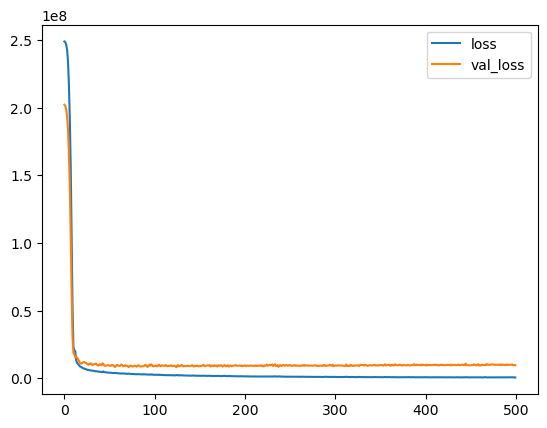

In [49]:
loss_df.plot()

### Prediction

In [50]:
ypred=ann.predict(xtest)
ypred[:5]

2/2 [==============================] - 0s 0s/step


array([[6045.1636],
       [7685.6855],
       [5983.4404],
       [6290.5845],
       [8071.8184]], dtype=float32)

### Comparing Actual and Predicted Values using Dataframe

In [51]:
predict=pd.DataFrame({'Actual_Value':ytest,'Pred_Value':ypred.flatten()})
predict.head()

,Actual_Value,Pred_Value
0,6669.0,6045.163574
1,7999.0,7685.685547
2,6338.0,5983.440430
3,8916.5,6290.584473
4,10295.0,8071.818359


In [68]:
ypred.flatten()

array([ 6045.1636,  7685.6855,  5983.4404,  6290.5845,  8071.8184,
       28825.295 ,  8195.865 , 10257.159 ,  7229.112 ,  8787.445 ,
       16402.748 , 12635.889 , 13662.152 ,  8059.254 , 15061.764 ,
        9482.429 ,  8599.891 ,  6756.816 , 16743.486 , 11561.076 ,
       10733.336 ,  6507.3213, 15844.048 ,  8084.63  , 10770.855 ,
        6724.7983, 13713.345 , 10789.875 ,  7132.5728,  7812.519 ,
        7990.8813, 10162.127 , 26879.775 , 13770.325 , 15301.068 ,
        7697.1772,  8237.588 , 36290.184 , 14450.408 , 18045.484 ,
        7084.522 ], dtype=float32)

### R2 Score

In [74]:

#r2_score(ytest,ypred)
mae_dl=mean_absolute_error(ytest,ypred)
rmse_dl=np.sqrt(mean_absolute_error(ytest,ypred))
R2score_dl=r2_score(ytest,ypred)

print(f'Mean Absolute Error:--{mae_dl}')
print(f'Root Mean Square Error:--{rmse_dl}')
print(f'R2 Score:--{R2score_dl}')

Mean Absolute Error:--1913.1200219131097
Root Mean Square Error:--43.73922749561439
R2 Score:--0.8254049599939121


## Keras Tuner

In [53]:
from tensorflow import keras
import keras_tuner
from tabulate import tabulate

In [54]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=xtrain.shape[-1]))

    for i in range(hp.Int("num_layers",min_value=2, max_value=5, step=1)):
        model.add(
            keras.layers.Dense(

                units=hp.Int(f"units{i}", min_value=64, max_value=512, step=64),
                activation=hp.Choice("activation", ["selu","relu"]),
                kernel_initializer="normal"
            )
        )
    model.add(keras.layers.Dense(1,kernel_initializer="normal"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=["mae",keras.metrics.RootMeanSquaredError()],
    )
    return model

In [55]:
tuner = keras_tuner.RandomSearch( build_model, objective='val_loss',max_trials=300)
tuner.search_space_summary()

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
Search space summary
Default search space size: 8
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
activation (Choice)
{'default': 'selu', 'conditions': [], 'values': ['selu', 'relu'], 'ordered': False}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 512, 'step': 64, 'sampling': 'linear'}
units4 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 

In [56]:
tuner.search(xtrain, ytrain, epochs=20, validation_data=(xtest, ytest))

INFO:tensorflow:Oracle triggered exit


In [57]:
models = tuner.get_best_models()
best_model = models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1536      
                                                                 
 dense_1 (Dense)             (None, 448)               29120     
                                                                 
 dense_2 (Dense)             (None, 448)               201152    
                                                                 
 dense_3 (Dense)             (None, 256)               114944    
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 347,009
Trainable params: 347,009
Non-trainable params: 0
_________________________________________________________________


In [58]:
best_model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 23),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'RandomNormal',
     'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 448,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'RandomNormal',
     'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}},


In [59]:
final_model=best_model.fit(xtrain, ytrain, epochs=100, validation_data=(xtest, ytest))

Epoch 1/100
6/6 [==============================] - 1s 44ms/step - loss: 4218338.0000 - mae: 1473.1201 - root_mean_squared_error: 2053.8594 - val_loss: 9975704.0000 - val_mae: 1969.1675 - val_root_mean_squared_error: 3158.4338
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 4815439.0000 - mae: 1577.4377 - root_mean_squared_error: 2194.4109 - val_loss: 7268642.5000 - val_mae: 1827.1426 - val_root_mean_squared_error: 2696.0417
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 4341272.5000 - mae: 1540.2871 - root_mean_squared_error: 2083.5720 - val_loss: 8972059.0000 - val_mae: 1894.7021 - val_root_mean_squared_error: 2995.3396
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 3964008.5000 - mae: 1429.8547 - root_mean_squared_error: 1990.9818 - val_loss: 8853962.0000 - val_mae: 2019.9871 - val_root_mean_squared_error: 2975.5608
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 4166551.7500 - mae: 1417

6/6 [==============================] - 0s 9ms/step - loss: 4107147.2500 - mae: 1452.5934 - root_mean_squared_error: 2026.6097 - val_loss: 12109026.0000 - val_mae: 2105.2295 - val_root_mean_squared_error: 3479.8025
Epoch 38/100
6/6 [==============================] - 0s 10ms/step - loss: 3066469.7500 - mae: 1323.3221 - root_mean_squared_error: 1751.1338 - val_loss: 7799399.0000 - val_mae: 1840.5583 - val_root_mean_squared_error: 2792.7405
Epoch 39/100
6/6 [==============================] - 0s 9ms/step - loss: 2195332.5000 - mae: 1096.8206 - root_mean_squared_error: 1481.6654 - val_loss: 9316972.0000 - val_mae: 2056.4436 - val_root_mean_squared_error: 3052.3716
Epoch 40/100
6/6 [==============================] - 0s 10ms/step - loss: 2085093.8750 - mae: 1061.6217 - root_mean_squared_error: 1443.9855 - val_loss: 10133568.0000 - val_mae: 2098.6440 - val_root_mean_squared_error: 3183.3267
Epoch 41/100
6/6 [==============================] - 0s 9ms/step - loss: 1980551.7500 - mae: 1034.3876 - r

6/6 [==============================] - 0s 13ms/step - loss: 3243225.2500 - mae: 1282.9369 - root_mean_squared_error: 1800.8956 - val_loss: 8949004.0000 - val_mae: 2021.8513 - val_root_mean_squared_error: 2991.4885
Epoch 74/100
6/6 [==============================] - 0s 13ms/step - loss: 5365808.5000 - mae: 1637.8700 - root_mean_squared_error: 2316.4214 - val_loss: 18431968.0000 - val_mae: 2863.6494 - val_root_mean_squared_error: 4293.2466
Epoch 75/100
6/6 [==============================] - 0s 14ms/step - loss: 7413511.0000 - mae: 1975.3314 - root_mean_squared_error: 2722.7764 - val_loss: 19596088.0000 - val_mae: 3016.2454 - val_root_mean_squared_error: 4426.7471
Epoch 76/100
6/6 [==============================] - 0s 11ms/step - loss: 15473171.0000 - mae: 2740.0154 - root_mean_squared_error: 3933.5952 - val_loss: 17224280.0000 - val_mae: 2609.3696 - val_root_mean_squared_error: 4150.2144
Epoch 77/100
6/6 [==============================] - 0s 14ms/step - loss: 18660926.0000 - mae: 2632.19

In [60]:
loss=pd.DataFrame(final_model.history)

In [61]:
loss.head()

,loss,mae,root_mean_squared_error,val_loss,val_mae,val_root_mean_squared_error
0,4218338.00,1473.120117,2053.859375,9975704.0,1969.167480,3158.433838
1,4815439.00,1577.437744,2194.410889,7268642.5,1827.142578,2696.041748
2,4341272.50,1540.287109,2083.572021,8972059.0,1894.702148,2995.339600
3,3964008.50,1429.854736,1990.981812,8853962.0,2019.987061,2975.560791
4,4166551.75,1417.273438,2041.213257,8109488.5,1838.270996,2847.716309


<Axes: >

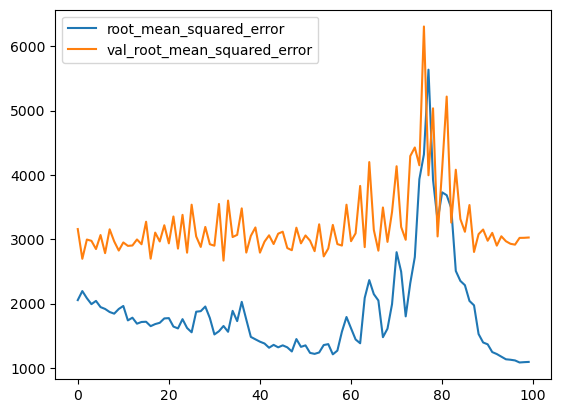

In [62]:
loss[['root_mean_squared_error','val_root_mean_squared_error']].plot()

In [63]:
from sklearn.metrics import r2_score
pred=best_model.predict(xtest)
R2_NN=r2_score(y_true=ytest,y_pred=pred)
mae_kt=mean_absolute_error(ytest,pred,)
rmse_kt=np.sqrt(mean_absolute_error(ytest,pred,))
R2score_kt=r2_score(ytest,pred)

print(f'Mean Absolute Error:--{mae_kt}')
print(f'Root Mean Square Error:--{rmse_kt}')
print(f'R2 Score:--{R2score_kt}')

2/2 [==============================] - 0s 3ms/step
Mean Absolute Error:--1990.893923875762
Root Mean Square Error:--44.619434374224895
R2 Score:--0.8332690683423195


In [64]:
R2_NN

0.8332690683423195

## After comparing Machine Learning and Deep Learning Algorithm


In [75]:
print(tabulate(pd.DataFrame(data={"R2 Score":[R2score*100,R2score_rf*100,R2score_dl*100,R2score_kt*100],"RMSE":[rmse,rmse_rf,rmse_dl,rmse_kt],"MAE":[mae,mae_rf,mae_dl,mae_kt]},index=["Multi-Variable Regression","RandomForest","Neural Network","DL tuner"]), headers="keys", tablefmt='fancy_grid'))

╒═══════════════════════════╤════════════╤═══════════╤═════════╕
│                           │   R2 Score │      RMSE │     MAE │
╞═══════════════════════════╪════════════╪═══════════╪═════════╡
│ Multi-Variable Regression │    81.4175 │ 3830.11   │ 2342.89 │
├───────────────────────────┼────────────┼───────────┼─────────┤
│ RandomForest              │    95.8651 │   35.6404 │ 1270.24 │
├───────────────────────────┼────────────┼───────────┼─────────┤
│ Neural Network            │    82.5405 │   43.7392 │ 1913.12 │
├───────────────────────────┼────────────┼───────────┼─────────┤
│ DL tuner                  │    83.3269 │   44.6194 │ 1990.89 │
╘═══════════════════════════╧════════════╧═══════════╧═════════╛


#### Ramdom Forest Regressor Perform Best!!!

